# Preparing the seasonal temperature anamolies data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

fp = 'data/2315676.txt' #fp means filepath

data = pd.read_csv(fp, na_values = -9999, skiprows = [1], delim_whitespace = True)

def estimates(df):
    if pd.isnull(df.TAVG):
        return (df.TMAX + df.TMIN)/2
    else:
        return df.TAVG
    
data['TAVG_EST'] = data.apply(estimates, axis = 'columns')

data.dropna(subset=['TAVG_EST'], inplace=True)

def fahr_to_celsius(temp_fahr):
    """Function to convert temperatures from fahranhiet to celsius
    
    Parameters
    --------
    
    temp_fahr: int | float
        Input temperature in fahranheit (should be a number)
        
    Returns
    ------
    
    Temperature in celsius (float)
    
    """
    return (temp_fahr -32)/(1.8)

data['TAVG_C'] = fahr_to_celsius(data['TAVG_EST'])


data['date_str'] = data['DATE'].astype(str)

data['YRMO'] = data['date_str'].str.slice(start=0,stop=6)
data['YRMO'] = data['YRMO'].astype(int)

data['year'] = data['date_str'].str.slice(start=0, stop=4)
data['year'] = data['year'].astype(int)

data['month'] = data['date_str'].str.slice(start=4, stop=6)
data['month'] = data['month'].astype(int)

#For the period of 1909 - 2019

winter_data = data[['TAVG_C', 'YRMO', 'year','month']].loc[(data.month ==12) | (data.month ==1) | (data.month ==2)]
spring_data = data[['TAVG_C', 'YRMO', 'year','month']].loc[(data.month ==3) | (data.month ==4) | (data.month ==5)]
summer_data = data[['TAVG_C', 'YRMO', 'year','month']].loc[(data.month ==6) | (data.month ==7) | (data.month ==8)]
autumn_data = data[['TAVG_C', 'YRMO', 'year','month']].loc[(data.month ==9) | (data.month ==10) | (data.month ==11)]


spring_data = spring_data.loc[(spring_data.year > 1908) & (spring_data.year < 2020)]
spring_grouped = spring_data['TAVG_C'].groupby(spring_data['year']).mean()

summer_data = summer_data.loc[(summer_data.year > 1908) & (summer_data.year < 2020)]
summer_grouped = summer_data['TAVG_C'].groupby(summer_data['year']).mean()

autumn_data = autumn_data.loc[(autumn_data.year > 1908) & (autumn_data.year < 2020)]
autumn_grouped = autumn_data['TAVG_C'].groupby(autumn_data['year']).mean()


winter_data = winter_data.loc[winter_data.year != 2020]
group1 = winter_data['TAVG_C'].groupby(winter_data['YRMO']).mean()
group1 = group1.drop(labels=[190801, 190802, 201912])
group2 = group1.to_frame()

year_list = []
for i in range(1909, 2020):
    year_list = year_list + [i,i,i]
    
group2.insert(1, 'year', year_list)
winter_grouped = group2['TAVG_C'].groupby(group2['year']).mean()

#For the reference period of 1951 - 1980

ref_winter_data = data[['TAVG_C', 'YRMO', 'year','month']].loc[(data.month ==12) | (data.month ==1) | (data.month ==2)]
ref_spring_data = data[['TAVG_C', 'YRMO', 'year','month']].loc[(data.month ==3) | (data.month ==4) | (data.month ==5)]
ref_summer_data = data[['TAVG_C', 'YRMO', 'year','month']].loc[(data.month ==6) | (data.month ==7) | (data.month ==8)]
ref_autumn_data = data[['TAVG_C', 'YRMO', 'year','month']].loc[(data.month ==9) | (data.month ==10) | (data.month ==11)]

ref_winter_data = ref_winter_data.loc[(ref_winter_data.year > 1949) & (ref_winter_data.year < 1981)]

ref_spring_data = ref_spring_data.loc[(ref_spring_data.year > 1950) & (ref_spring_data.year < 1981)]
ref_spring_grouped = ref_spring_data['TAVG_C'].groupby(ref_spring_data['year']).mean()

ref_summer_data = ref_summer_data.loc[(ref_summer_data.year > 1950) & (ref_summer_data.year < 1981)]
ref_summer_grouped = ref_summer_data['TAVG_C'].groupby(ref_summer_data['year']).mean()

ref_autumn_data = ref_autumn_data.loc[(ref_autumn_data.year > 1950) & (ref_autumn_data.year < 1981)]
ref_autumn_grouped = ref_autumn_data['TAVG_C'].groupby(ref_autumn_data['year']).mean()

group3 = ref_winter_data['TAVG_C'].groupby(ref_winter_data['YRMO']).mean()
group3 = group3.drop(labels=[195001, 195002, 198012])
group4 = group3.to_frame()

ref_year_list = []
for i in range(1951, 1981):
    ref_year_list = ref_year_list + [i,i,i]
    
group4.insert(1, 'year', ref_year_list)
ref_winter_grouped = group4['TAVG_C'].groupby(group4['year']).mean()

#Finding anamolies 
winter_temp = ref_winter_grouped.mean()
summer_temp = ref_summer_grouped.mean()
spring_temp = ref_spring_grouped.mean()
autumn_temp = ref_autumn_grouped.mean()

winter_grouped = winter_grouped - winter_temp
summer_grouped = summer_grouped - summer_temp
spring_grouped = spring_grouped - spring_temp
autumn_grouped = autumn_grouped - autumn_temp

# Plotting the graph

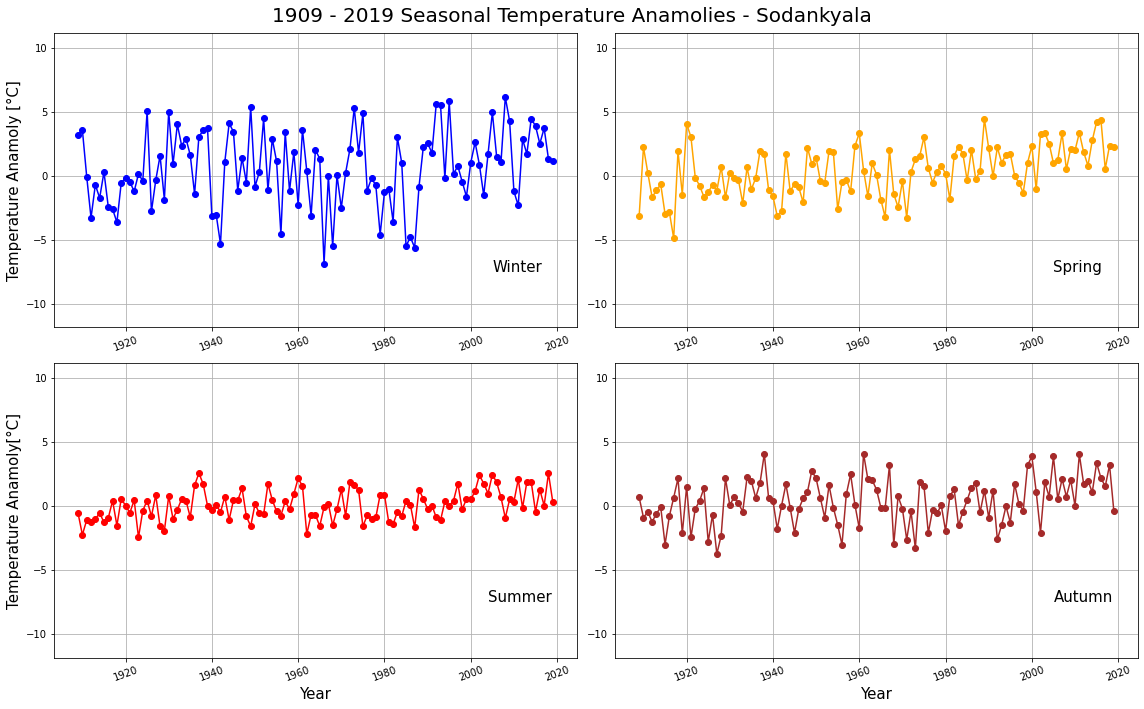

In [3]:
# Find lower limit for y-axis
min_temp = min(winter_grouped.min(), spring_grouped.min(), summer_grouped.min(), autumn_grouped.min())
min_temp = min_temp - 5.0

# Find upper limit for y-axis
max_temp = max(winter_grouped.max(), spring_grouped.max(), summer_grouped.max(), autumn_grouped.max())
max_temp = max_temp + 5.0


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,10));
axs

ax11 = axs[0][0]
ax12 = axs[0][1]
ax21 = axs[1][0]
ax22 = axs[1][1]

# Set plot line width
line_width = 1.5

# Plot data
winter_grouped.plot(ax=ax11, c='blue', lw=line_width, style = 'ro-', 
                  ylim=[min_temp, max_temp], grid=True)
spring_grouped.plot(ax=ax12, c='orange', lw=line_width, style = 'ro-',
                  ylim=[min_temp, max_temp], grid=True)
summer_grouped.plot(ax=ax21, c='red', lw=line_width, style = 'ro-',
                  ylim=[min_temp, max_temp], grid=True)
autumn_grouped.plot(ax=ax22, c='brown', lw=line_width, style = 'ro-',
                  ylim=[min_temp, max_temp], grid=True)

# Set figure title
fig.suptitle('1909 - 2019 Seasonal Temperature Anamolies - Sodankyala', size = 20)

# Rotate the x-axis labels so they don't overlap
plt.setp(ax11.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax12.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax21.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax22.xaxis.get_majorticklabels(), rotation=20)

# Axis labels
ax21.set_xlabel('Year', size = 15)
ax22.set_xlabel('Year', size = 15)
ax11.set_ylabel('Temperature Anamoly [°C]', size = 15)
ax11.set_xlabel("")
ax12.set_xlabel("")
ax21.set_ylabel('Temperature Anamoly[°C]', size = 15)

# Season label text
ax11.text(2005, -7.5, 'Winter', size = 15)
ax12.text(2005, -7.5, 'Spring', size = 15)
ax21.text(2004, -7.5, 'Summer', size = 15)
ax22.text(2005, -7.5, 'Autumn', size = 15)

fig.tight_layout()

#plt.savefig('final_plot.jpeg', )